# **Gym Members Exercise Dataset - Retrieved from Kaggle**

**Dataset Overview**

- **This is a fitness dataset** that contains exercise-related data of gym members, including personal attributes and workout metrics.
- **Number of Records:** 973
- **Number of Features:** 15
- **Source:** Valakhorasani. (2024). Gym Members Exercise Dataset [Kaggle Dataset]. [Link to Dataset](https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset)

**Feature Description**

| Feature                             | Description                                                                 |
|-------------------------------------|-----------------------------------------------------------------------------|
| **Age**                             | Age of the gym member.                                                     |
| **Gender**                          | Gender of the gym member (Male or Female).                                 |
| **Weight (kg)**                     | Member’s weight in kilograms.                                              |
| **Height (m)**                      | Member’s height in meters.                                                 |
| **Max_BPM**                         | Maximum heart rate (beats per minute) during workout sessions.             |
| **Avg_BPM**                         | Average heart rate during workout sessions.                                |
| **Resting_BPM**                     | Heart rate at rest before workout.                                         |
| **Session_Duration (hours)**       | Duration of each workout session in hours.                                 |
| **Calories_Burned**                 | Total calories burned during each session.                                 |
| **Workout_Type**                    | Type of workout performed (e.g., Cardio, Strength, Yoga, HIIT).            |
| **Fat_Percentage**                 | Body fat percentage of the member.                                         |
| **Water_Intake (liters)**          | Daily water intake during workouts.                                        |
| **Workout_Frequency (days/week)**  | Number of workout sessions per week.                                       |
| **Experience_Level**                | Level of experience, from beginner (1) to expert (3).                      |
| **BMI**                             | Body Mass Index, calculated from height and weight.    

# **Import Required Library**

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm, poisson, binom, chi2_contingency, ttest_ind, f_oneway, shapiro, kstest, probplot, chisquare, expon, kstest, anderson

# **Load the Dataset**

In [83]:
data = pd.read_csv('gym_members_exercise_tracking.csv')

data

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


# **Exploratory Data Analysis - EDA**

## **Data Overview**



*   **Number Of Records And Features**



In [84]:
raw_df = data.copy()

num_records = raw_df.shape[0]
num_features = raw_df.shape[1]

print("Number of records:", num_records)
print("Number of features:", num_features)

Number of records: 973
Number of features: 15




*   **Column Heading**



In [85]:
print(raw_df.columns)

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')




*   **Data Type of Each Variable**




In [86]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int



*   **Check for Missing Values**



In [87]:
raw_df.isnull().sum()

,0
Age,0
Gender,0
Weight (kg),0
Height (m),0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,0
Workout_Type,0




*   **Check for Duplicated Rows**



In [88]:
duplicated_rows = raw_df.duplicated().sum()

print("Number of Duplicated Rows =", duplicated_rows)

Number of Duplicated Rows = 0


## **Descriptive Statistical Analysis**



*   **Check for Unique Values of Each Column**



In [89]:
raw_df.nunique()

,0
Age,42
Gender,2
Weight (kg),532
Height (m),51
Max_BPM,40
Avg_BPM,50
Resting_BPM,25
Session_Duration (hours),147
Calories_Burned,621
Workout_Type,4


*   **Summary Statistics**

In [90]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,973.0,38.683453,12.180928,18.00,28.00,40.00,49.00,59.00
Weight (kg),973.0,73.854676,21.207500,40.00,58.10,70.00,86.00,129.90
Height (m),973.0,1.722580,0.127720,1.50,1.62,1.71,1.80,2.00
Max_BPM,973.0,179.883864,11.525686,160.00,170.00,180.00,190.00,199.00
Avg_BPM,973.0,143.766701,14.345101,120.00,131.00,143.00,156.00,169.00
Resting_BPM,973.0,62.223022,7.327060,50.00,56.00,62.00,68.00,74.00
Session_Duration (hours),973.0,1.256423,0.343033,0.50,1.04,1.26,1.46,2.00
Calories_Burned,973.0,905.422405,272.641516,303.00,720.00,893.00,1076.00,1783.00
Fat_Percentage,973.0,24.976773,6.259419,10.00,21.30,26.20,29.30,35.00
Water_Intake (liters),973.0,2.626619,0.600172,1.50,2.20,2.60,3.10,3.70




*   **Gender Distribution in Gym Members**



In [91]:
gender_counts = raw_df['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

custom_colors = {
    'Male': '#4A90E2',
    'Female': '#FF69B4'
}

fig = px.pie(
    gender_counts,
    names='Gender',
    values='Count',
    title='Distribution of Gender in Gym Members',
    color='Gender',
    color_discrete_map=custom_colors
)

fig.show()



*   **Workout Type Distribution by Gender**



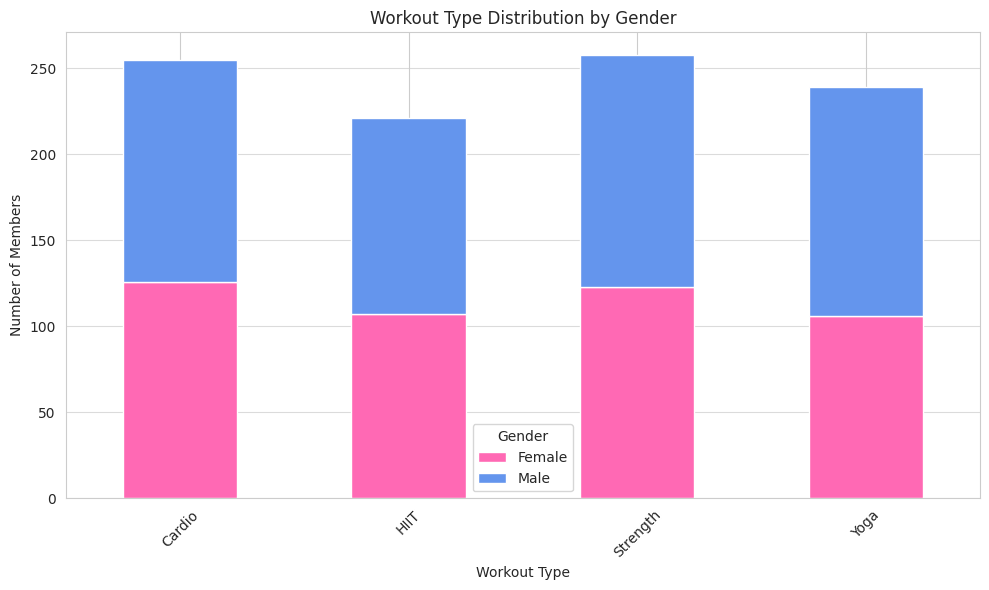

In [92]:
ct = pd.crosstab(raw_df['Workout_Type'], raw_df['Gender'])

colors = ['hotpink', 'cornflowerblue']

ct.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=colors
)

plt.title('Workout Type Distribution by Gender')
plt.xlabel('Workout Type')
plt.ylabel('Number of Members')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()



*   **Experience Level Distribution of Gym Members**

In [93]:
exp_counts = raw_df['Experience_Level'].value_counts().sort_index().reset_index()
exp_counts.columns = ['Experience Level', 'Count']

level_labels = {1: 'Beginner', 2: 'Intermediate', 3: 'Expert'}
exp_counts['Experience Level'] = exp_counts['Experience Level'].map(level_labels)

fig = px.bar(
    exp_counts,
    x='Experience Level',
    y='Count',
    text='Count',
    title='Experience Level Distribution of Gym Members',
    color='Experience Level',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_traces(textposition='outside')

fig.show()



*   **Distribution of Workout Types in Gym**



In [94]:
workout_type_counts = raw_df['Workout_Type'].value_counts().reset_index()
workout_type_counts.columns = ["Workout Type", 'Count']

fig = px.pie(
    workout_type_counts,
    names='Workout Type',
    values='Count',
    title='Distribution of Workout Types in Gym',
    color='Workout Type',
    color_discrete_sequence=px.colors.qualitative.Set3
)

fig.show()



*   **Cardio Burn By Workout Type**



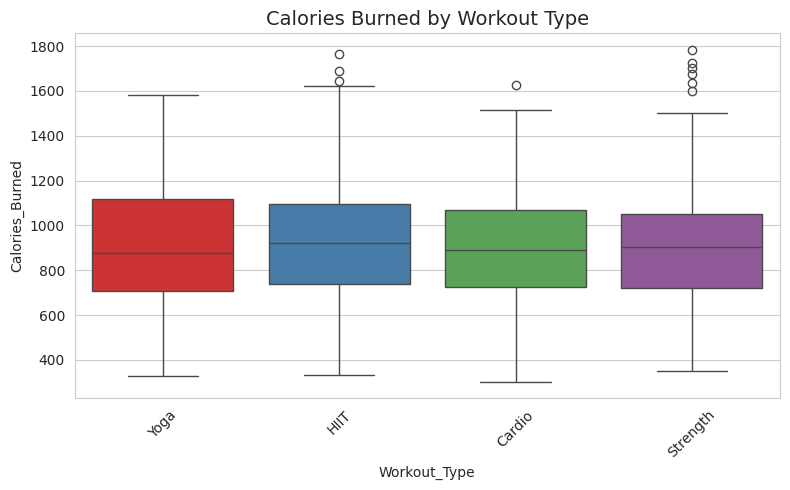

In [95]:
plt.figure(figsize=(8, 5))

sns.boxplot(
    x='Workout_Type',
    y='Calories_Burned',
    data=raw_df,
    palette='Set1',
    hue='Workout_Type'
)

plt.title('Calories Burned by Workout Type', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



*   **Workout Frequency Of Gym Members**



In [96]:
frequency_counts = raw_df['Workout_Frequency (days/week)'].value_counts().sort_index().reset_index()
frequency_counts.columns = ['Workout Days per Week', 'Count']

fig = px.bar(
    frequency_counts,
    x='Workout Days per Week',
    y='Count',
    text='Count',
    title='Workout Frequency per Week',
    color='Workout Days per Week',
    color_discrete_sequence=px.colors.qualitative.Set2
)


fig.update_traces(textposition='outside')

fig.show()



*   **Workout Frequency by Experience Level**


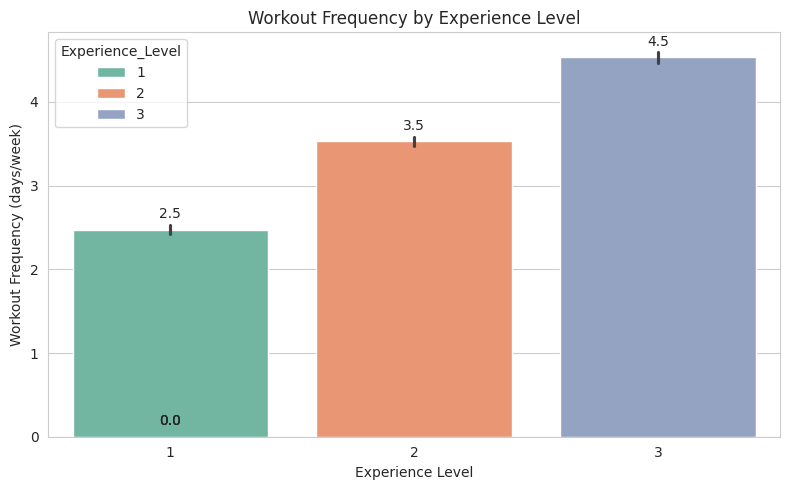

In [97]:
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

ax = sns.barplot(
    x='Experience_Level',
    y='Workout_Frequency (days/week)',
    data=raw_df,
    palette='Set2',
    hue="Experience_Level"
)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.1),
                ha='center', va='bottom')

plt.title('Workout Frequency by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Workout Frequency (days/week)')
plt.tight_layout()
plt.show()



*   **Average Fat Pecentage By Gender and Experience Level**



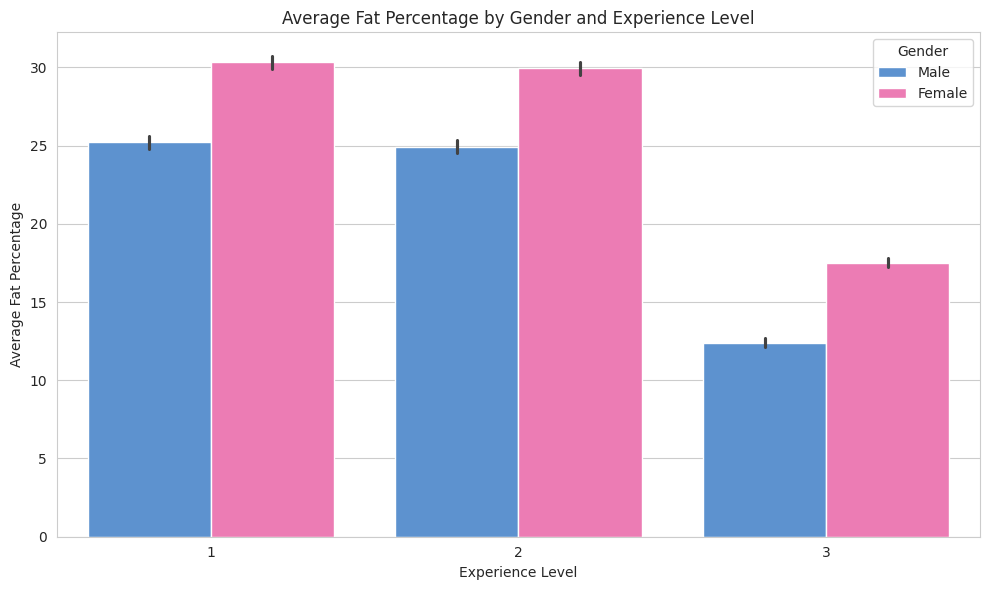

In [98]:
plt.figure(figsize=(10, 6))

custom_palette = {
    'Female': '#FF69B4',
    'Male': '#4A90E2'
}

sns.barplot(
    x='Experience_Level',
    y='Fat_Percentage',
    hue='Gender',
    data=raw_df,
    palette=custom_palette
)

plt.title('Average Fat Percentage by Gender and Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Fat Percentage')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()



*   **Relationship Between Water Intake and Workout Duration**



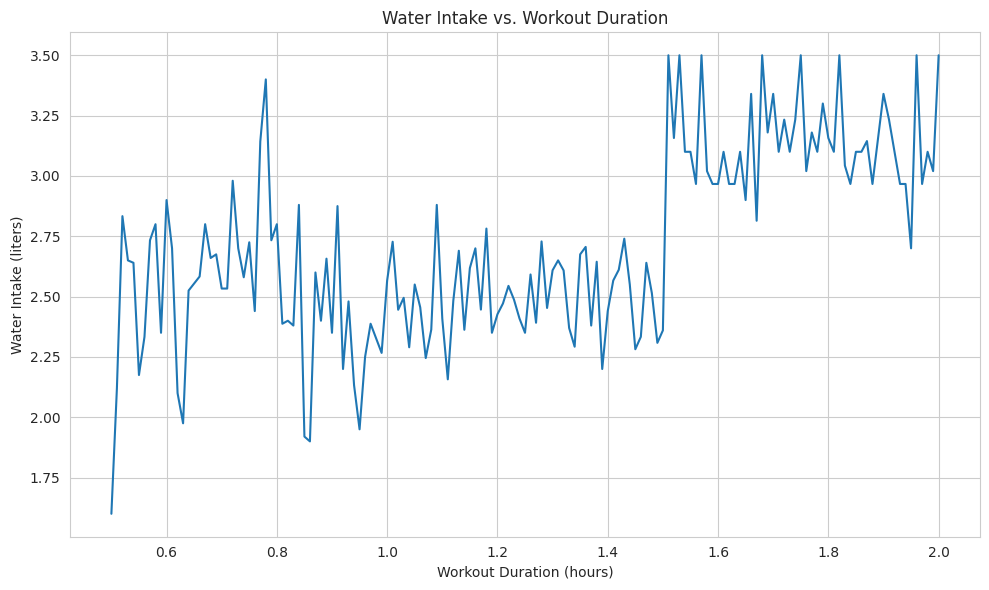

In [99]:
plt.figure(figsize=(10, 6))

sns.lineplot(x='Session_Duration (hours)', y='Water_Intake (liters)', data=raw_df, errorbar=None)

plt.title('Water Intake vs. Workout Duration')
plt.xlabel('Workout Duration (hours)')
plt.ylabel('Water Intake (liters)')

plt.grid(True)

plt.tight_layout()
plt.show()

## **Outlier Detection**



*   **Using IQR Method**



In [100]:
cols = [
    'Age',
    'Weight (kg)',
    'Height (m)',
    'Max_BPM',
    'Avg_BPM',
    'Resting_BPM',
    'Session_Duration (hours)',
    'Calories_Burned',
    'Fat_Percentage',
    'Water_Intake (liters)',
    'Workout_Frequency (days/week)',
    'BMI'
]

for col in cols:
    Q1 = raw_df[col].quantile(0.25)
    Q3 = raw_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"{col} Feature: ", end="")
    print("Q1 =", Q1, end="; ")
    print("Q3 =", Q3, end="; ")
    print("IQR =", IQR, end="; ")
    print(f"Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")

    outliers = raw_df[(raw_df[col] < lower_bound) | (raw_df[col] > upper_bound)]
    print(f"Number of Outliers in {col}: {outliers.shape[0]}")

    if outliers.shape[0] > 0:
        raw_df = raw_df.drop(outliers.index)
        print(f"Outliers removed from {col}")
    else:
        print(f"No outliers found in {col}")

    print("--------------------------------------------------------------------------------------")

Age Feature: Q1 = 28.0; Q3 = 49.0; IQR = 21.0; Lower Bound = -3.5, Upper Bound = 80.5
Number of Outliers in Age: 0
No outliers found in Age
--------------------------------------------------------------------------------------
Weight (kg) Feature: Q1 = 58.1; Q3 = 86.0; IQR = 27.9; Lower Bound = 16.250000000000007, Upper Bound = 127.85
Number of Outliers in Weight (kg): 9
Outliers removed from Weight (kg)
--------------------------------------------------------------------------------------
Height (m) Feature: Q1 = 1.62; Q3 = 1.8; IQR = 0.17999999999999994; Lower Bound = 1.35, Upper Bound = 2.07
Number of Outliers in Height (m): 0
No outliers found in Height (m)
--------------------------------------------------------------------------------------
Max_BPM Feature: Q1 = 170.0; Q3 = 190.0; IQR = 20.0; Lower Bound = 140.0, Upper Bound = 220.0
Number of Outliers in Max_BPM: 0
No outliers found in Max_BPM
--------------------------------------------------------------------------------------




*   **Box Plot After Removing Outliers**



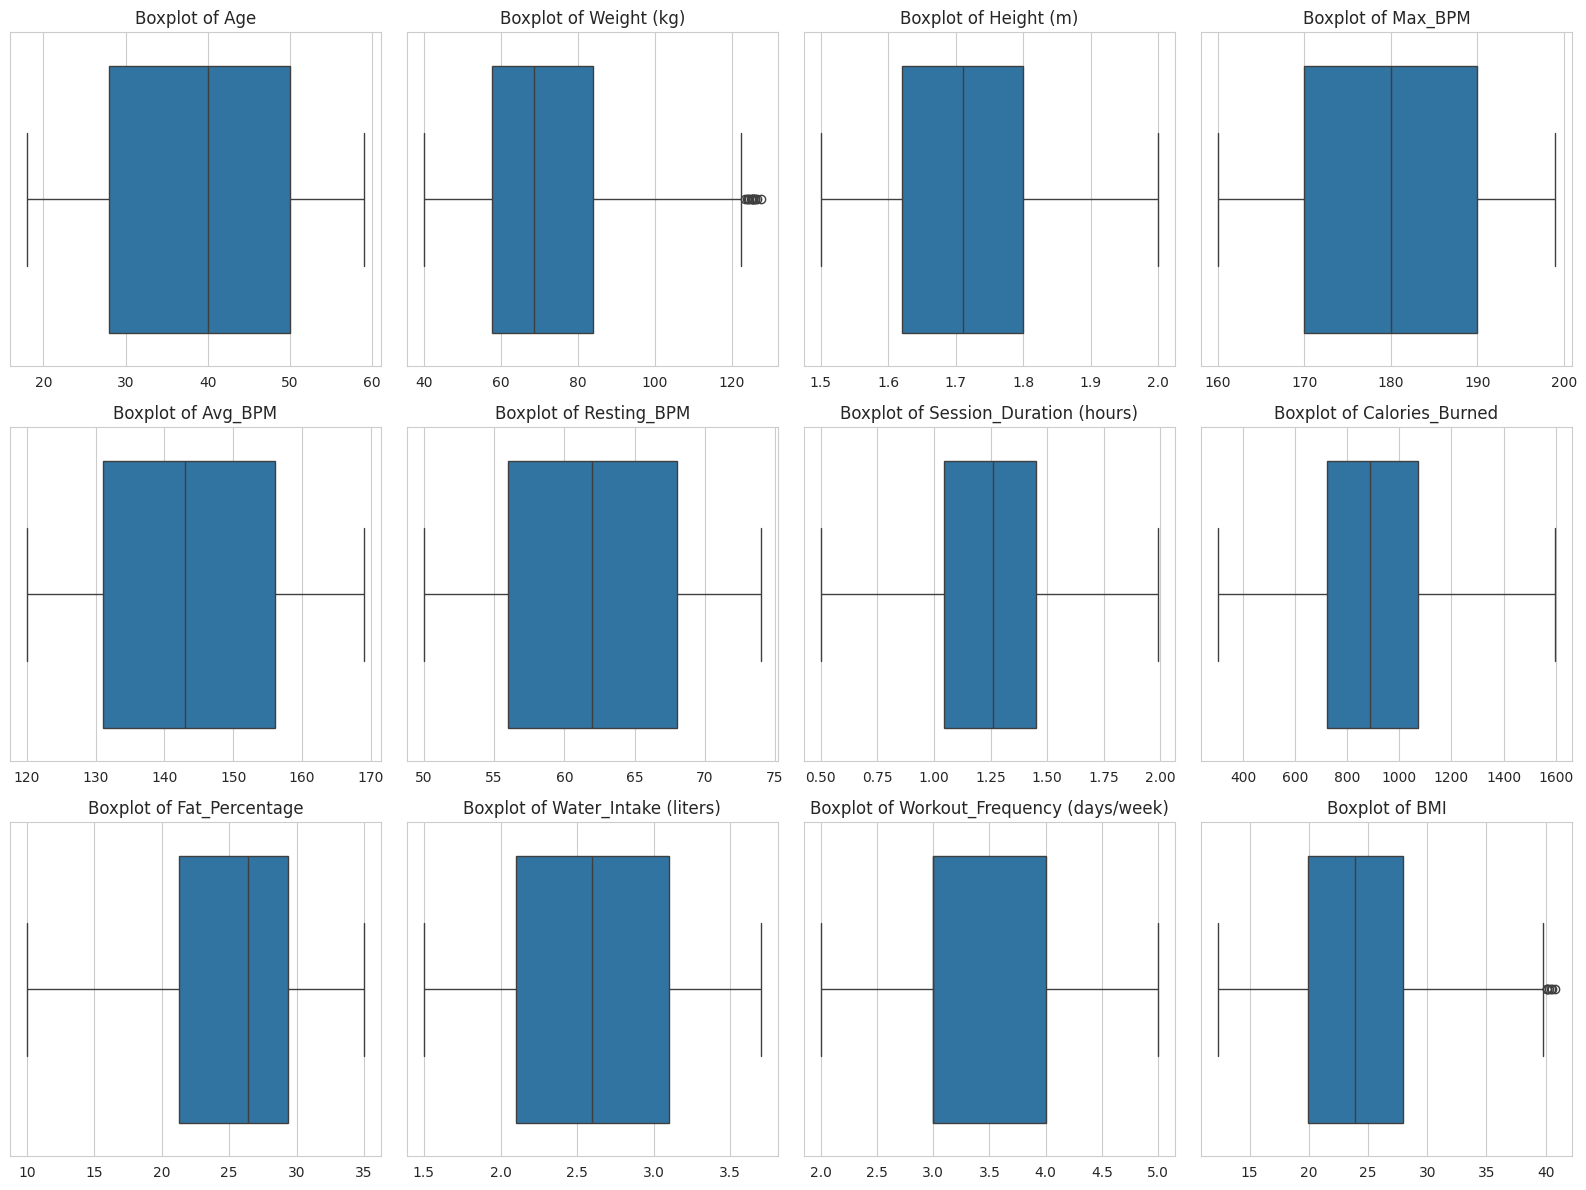

In [101]:
rows = 3
cols_per_row = 4

fig, axes = plt.subplots(rows, cols_per_row, figsize=(16, 12))

axes = axes.flatten()

for i, col in enumerate(cols):
    if i < len(cols):
        sns.boxplot(data=raw_df, x=col, ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_xlabel('')

plt.tight_layout()
plt.show()



*   **Statistical Summary After Removing Outliers**


In [102]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,931.0,38.796992,12.123674,18.00,28.000,40.00,50.000,59.00
Weight (kg),931.0,72.059184,19.509141,40.00,57.750,68.70,83.850,127.50
Height (m),931.0,1.723298,0.128552,1.50,1.620,1.71,1.800,2.00
Max_BPM,931.0,179.900107,11.502394,160.00,170.000,180.00,190.000,199.00
Avg_BPM,931.0,143.438238,14.302387,120.00,131.000,143.00,156.000,169.00
Resting_BPM,931.0,62.170784,7.356794,50.00,56.000,62.00,68.000,74.00
Session_Duration (hours),931.0,1.254382,0.339775,0.50,1.045,1.26,1.450,1.99
Calories_Burned,931.0,898.447905,262.884684,303.00,720.000,888.00,1071.500,1598.00
Fat_Percentage,931.0,25.136627,6.229324,10.00,21.300,26.40,29.400,35.00
Water_Intake (liters),931.0,2.611600,0.600658,1.50,2.100,2.60,3.100,3.70


## **Dataset Insight Summary**

* The dataset shows a relatively even gender distribution, with 52% male and 48% female.
* For **Cardio**, **HIIT**, and **Strength** workouts, participation rates between males and females are nearly equal.
* **Cardio** and **Strength** are the most popular workout types.
* **HIIT** has the lowest number of participants.
* In every workout type, the number of male participants is higher than that of females.
* Most individuals fall into the **Beginner** or **Intermediate** fitness level categories.
* **HIIT** burns the most calories, while **Yoga** burns the least—but the difference is not drastic.
* The majority of people work out **3 to 4 times per week**. The higher the fitness level, the more frequently they train.
* Individuals at the **Expert** level have the lowest body fat percentage, while those at the **Beginner** and **Intermediate** levels have similar body fat percentages.


# **Probability Distribution**

*   **Comparing Column Distribution to Normal Distribution**
> By overlaying a normal curve (with the same mean and standard deviation), we can visually assess the mismatch between the actual data and the idealized normal assumption.
> Calories_Burned and BMI are continuous variables, so we will examine whether these variables follow a normal distribution.

In [103]:
def norm_visualize(df, col_name):
    data = pd.to_numeric(df[col_name], errors='coerce').dropna()
    mu, std = data.mean(), data.std()
    plt.figure(figsize=(8, 4))
    sns.histplot(data, bins=30, kde=True, stat='density', alpha=0.4, color='skyblue', label='Histogram + KDE')
    x = np.linspace(data.min(), data.max(), 100)
    plt.plot(x, norm.pdf(x, mu, std), 'r--', linewidth=2, label=f'N(μ={mu:.2f}, σ={std:.2f})')
    plt.title(f"Distribution of {col_name} vs Normal")
    plt.xlabel(col_name)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

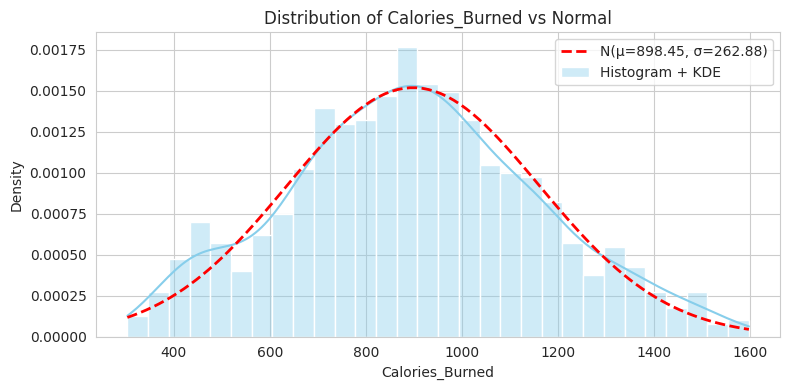

In [104]:
norm_visualize(raw_df, 'Calories_Burned')

> The **Calories_Burned** distribution is *approximately* normal, with slight skew and minor deviations. It’s close enough for most analyses but should be tested formally for strict assumptions.

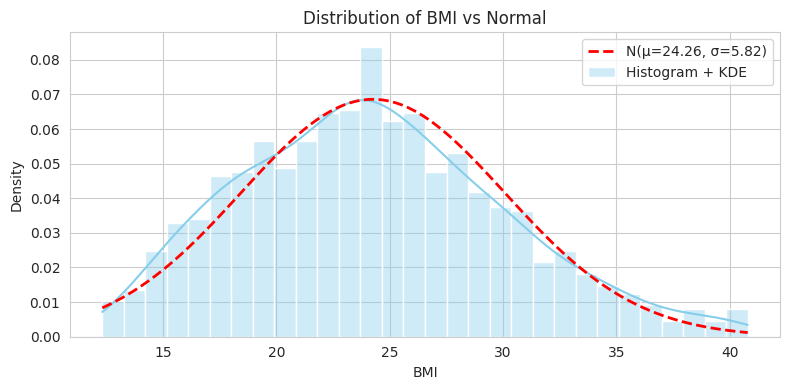

In [105]:
norm_visualize(raw_df, 'BMI')

> The **BMI** distribution is *approximately* normal, with a *slight right skew*. The histogram and KDE are close to the normal curve, though there's a longer tail on the right. Suitable for most analyses, but formal tests are recommended for strict normality.

*   **Q-Q Plot to Compare Column Distribution with Normal Distribution**


In [106]:
def norm_qq(df, col):
    data = pd.to_numeric(df[col], errors='coerce').dropna()
    plt.figure(figsize=(6, 5))
    probplot(data, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot: {col} vs Normal")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

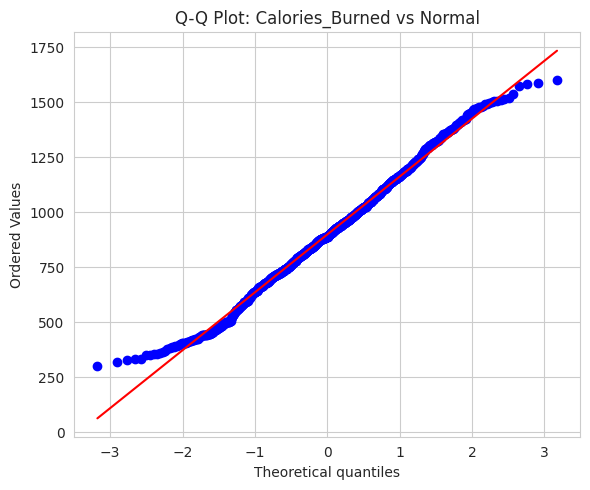

In [107]:
norm_qq(raw_df, 'Calories_Burned')



> The Q-Q plot shows that **Calories_Burned** is approximately normal, with slight deviations at both tails. Most points lie close to the red line, indicating a reasonably good fit to a normal distribution, though there may be mild skew or outliers.

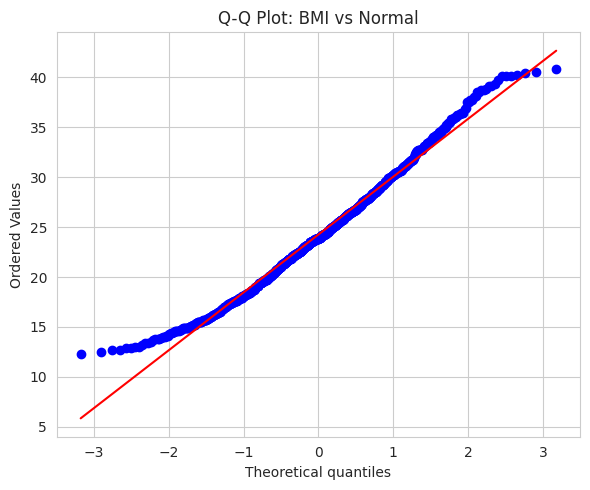

In [108]:
norm_qq(raw_df, 'BMI')

> There are clear deviations at both tails, especially the upper tail, indicating right skew. While the central values follow the red line fairly well, the overall shape deviates from normality, so normality assumption is questionable.

*   **Normality Test Using Shapiro-Wilk Method**

In [109]:
def shapiro_wilk(df, col, alpha=0.05):
  data = pd.to_numeric(df[col], errors='coerce').dropna()
  stat, p = stats.shapiro(data)
  print("KẾT QUẢ KIỂM ĐỊNH 'Shapiro-Wilk'")
  print("- Giá trị thống kê:", stat)
  print("- P-value:", p)
  print("- Mức ý nghĩa (alpha):", alpha)
  print("\nKẾT LUẬN:")
  if p > alpha:
      print("Dữ liệu có phân phối chuẩn")
  else:
      print("Dữ liệu KHÔNG có phân phối chuẩn")

In [110]:
shapiro_wilk(raw_df, 'Calories_Burned')

KẾT QUẢ KIỂM ĐỊNH 'Shapiro-Wilk'
- Giá trị thống kê: 0.9930610938603326
- P-value: 0.00024676859878214043
- Mức ý nghĩa (alpha): 0.05

KẾT LUẬN:
Dữ liệu KHÔNG có phân phối chuẩn


In [111]:
shapiro_wilk(raw_df, 'BMI')

KẾT QUẢ KIỂM ĐỊNH 'Shapiro-Wilk'
- Giá trị thống kê: 0.9864080130532666
- P-value: 1.342252743874782e-07
- Mức ý nghĩa (alpha): 0.05

KẾT LUẬN:
Dữ liệu KHÔNG có phân phối chuẩn


> **Shapiro-Wilk** test shows both Calories_Burned and BMI are *not* normally distributed (p < 0.05). Consider transformation or non-parametric methods.

*   **Normality Test Using Kolmogorov–Smirnov Method**

In [112]:
def kolmogorov_smirnov(df, col, alpha=0.05):
  data = pd.to_numeric(df[col], errors='coerce').dropna()
  mu, sigma = np.mean(data), np.std(data)
  stat, p = stats.kstest(data, 'norm', args=(mu, sigma))
  print("KẾT QUẢ KIỂM ĐỊNH 'Kolmogorov–Smirnov'")
  print("- Giá trị thống kê:", stat)
  print("- P-value:", p)
  print("- Mức ý nghĩa (alpha):", alpha)
  print(f"- Tham số ước lượng: μ={mu:.4f}, σ={sigma:.4f}")
  print("\nKẾT LUẬN:")
  if p > alpha:
      print("Dữ liệu có phân phối chuẩn")
  else:
      print("Dữ liệu KHÔNG có phân phối chuẩn")

In [113]:
kolmogorov_smirnov(raw_df, 'Calories_Burned')

KẾT QUẢ KIỂM ĐỊNH 'Kolmogorov–Smirnov'
- Giá trị thống kê: 0.023666679848283523
- P-value: 0.6650952334370748
- Mức ý nghĩa (alpha): 0.05
- Tham số ước lượng: μ=898.4479, σ=262.7435

KẾT LUẬN:
Dữ liệu có phân phối chuẩn


In [114]:
kolmogorov_smirnov(raw_df, 'BMI')

KẾT QUẢ KIỂM ĐỊNH 'Kolmogorov–Smirnov'
- Giá trị thống kê: 0.033524655756803745
- P-value: 0.24082515304420082
- Mức ý nghĩa (alpha): 0.05
- Tham số ước lượng: μ=24.2559, σ=5.8120

KẾT LUẬN:
Dữ liệu có phân phối chuẩn


> Although visualizations (histograms, Q-Q plots) suggest approximate normality, statistical tests give mixed results.

> * Shapiro-Wilk indicates both Calories_Burned and BMI are not normally distributed.

> * Kolmogorov-Smirnov suggests they follow normality.

> *  Due to Shapiro-Wilk’s higher sensitivity, we conclude that the data slightly deviates from normality.

*   **Poission Distribution Testing**

In [115]:
def poisson_visualize(df, col):
    data = pd.to_numeric(df[col], errors='coerce').dropna()
    mu = data.mean()
    values, counts = np.unique(data, return_counts=True)
    probs = counts / counts.sum()
    plt.figure(figsize=(8, 4))
    plt.bar(values, probs, alpha=0.7, color='skyblue', label='Observed')
    plt.plot(values, poisson.pmf(values, mu), 'ro-', label=f'Poisson (μ={mu:.2f})')
    plt.title(f"Distribution of {col} vs Poisson")
    plt.xlabel(col)
    plt.ylabel("Probability")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

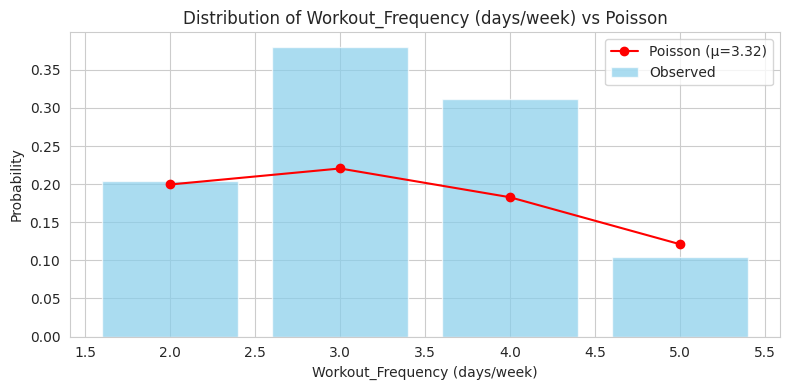

In [116]:
poisson_visualize(raw_df, 'Workout_Frequency (days/week)')

> The variable **Workout_Frequency** (days/week) *approximately* follows a Poisson distribution with λ = 3.32. The observed values align fairly well with the Poisson model, especially around the mean. However, there are slight deviations at the lower and higher ends. Overall, the Poisson distribution is a reasonable but not perfect fit.

*   **Poission Chi Squared Testing**

In [117]:
def poisson_chi_square(df, col, alpha=0.05):
    data = pd.to_numeric(df[col], errors='coerce').dropna()
    mu = data.mean()
    values, counts = np.unique(data, return_counts=True)
    expected = poisson.pmf(values, mu) * len(data)
    while np.any(expected < 5) and len(expected) > 3:
        values = np.append(values[:-2], values[-2])
        counts = np.append(counts[:-2], counts[-2] + counts[-1])
        expected = np.append(expected[:-2], expected[-2] + expected[-1])
    if len(counts) != len(expected):
        raise ValueError("Chiều dài counts và expected không khớp sau khi gộp")
    expected = expected * (counts.sum() / expected.sum())

    stat, p = chisquare(counts, expected)
    print("- Chi-Square:")
    print(f"  Statistic = {stat:.4f}, p-value = {p:.4f}")
    print(f"  Kết luận: {'Dữ liệu có phân phối Poisson' if p > alpha else 'Dữ liệu KHÔNG có phân phối Poisson'}")

In [118]:
poisson_chi_square(raw_df, 'Workout_Frequency (days/week)')

- Chi-Square:
  Statistic = 69.8503, p-value = 0.0000
  Kết luận: Dữ liệu KHÔNG có phân phối Poisson


In [119]:
def poisson_dispersion(df, col, alpha=0.05):
  data = pd.to_numeric(df[col], errors='coerce').dropna()
  mu = data.mean()
  variance = data.var()
  dispersion = (variance / mu) - 1
  print("- Dispersion:")
  print(f"  Statistic = {dispersion:.4f}")
  print(f"  Kết luận: {'Dữ liệu có phân phối Poisson' if abs(dispersion) < alpha else 'Dữ liệu KHÔNG có phân phối Poisson'}")

In [120]:
poisson_dispersion(raw_df, 'Workout_Frequency (days/week)')

- Dispersion:
  Statistic = -0.7486
  Kết luận: Dữ liệu KHÔNG có phân phối Poisson


> Although the histogram roughly matches a Poisson distribution (λ = 3.32), both the Chi-squared test and dispersion index indicate that the data does not follow a Poisson distribution.
> Visual inspection can be `misleading` when the data range is limited or discrete, making statistical tests more reliable for distribution assessment.

*   **Exponential Distribution Testing**
> Exponential distribution is commonly used to test time-related variables, such as waiting time or time between events.
>
> In this case, **Session_Duration (hours)** is used for testing.

In [121]:
def exponential_plot(df, column):
    data = df[column]
    data = data[data > 0]
    lambda_hat = 1 / np.mean(data)
    x = np.linspace(data.min(), data.max(), 100)
    pdf = expon.pdf(x, scale=1/lambda_hat)
    plt.figure(figsize=(10, 5))
    sns.histplot(data, bins=20, stat='density', kde=False, color='skyblue', label='Observed')
    plt.plot(x, pdf, 'r-', lw=2, label=f'Exponential PDF (λ={lambda_hat:.2f})')
    plt.title(f'Histogram vs Exponential PDF - {column}')
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.legend()
    plt.grid()
    plt.show()

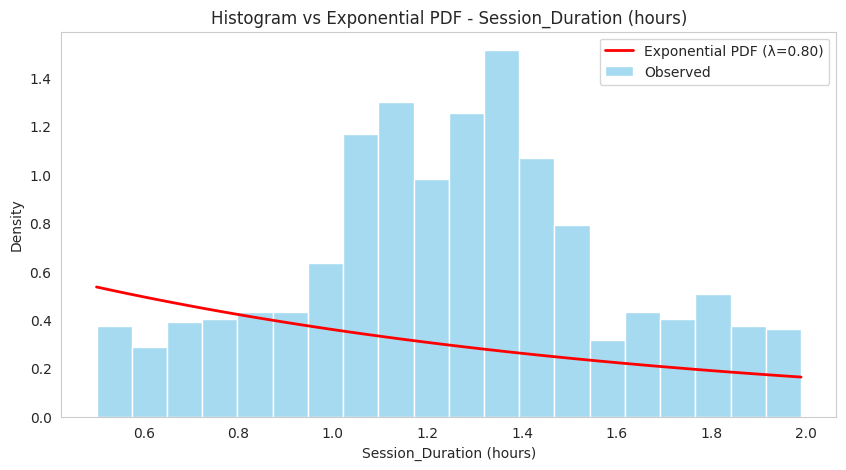

In [122]:
exponential_plot(raw_df, 'Session_Duration (hours)')

> The observed distribution of Session_Duration does not closely follow the exponential distribution (λ = 0.80), as it peaks in the middle rather than at the beginning. This suggests the data may not be well-modeled by an exponential distribution.

In [123]:
def exponential_ktest(df, column, alpha=0.05):
    data = df[column]
    data = data[data > 0]
    lambda_hat = 1 / np.mean(data)
    ks_stat, ks_p = kstest(data, 'expon', args=(0, 1/lambda_hat))
    print(f"[KS Test] Statistic = {ks_stat:.4f}, p-value = {ks_p:.4f}")
    if ks_p > alpha:
        print("Dữ liệu có thể theo phân phối mũ.")
    else:
        print("Dữ liệu không theo phân phối mũ.")

In [124]:
exponential_ktest(raw_df, 'Session_Duration (hours)')

[KS Test] Statistic = 0.3651, p-value = 0.0000
Dữ liệu không theo phân phối mũ.


In [125]:
def exponential_anderson(df, column):
    data = df[column]
    data = data[data > 0]
    lambda_hat = 1 / np.mean(data)
    ad_result = anderson(data, dist='expon')
    print(f"\n[Anderson-Darling Test] Statistic = {ad_result.statistic:.4f}")
    for cv, sig in zip(ad_result.critical_values, ad_result.significance_level):
        print(f" - Mức ý nghĩa {sig}%: Critical Value = {cv:.4f}")
    if ad_result.statistic < ad_result.critical_values[2]:
        print("Dữ liệu có thể theo phân phối mũ.")
    else:
        print("Dữ liệu không theo phân phối mũ.")

In [126]:
exponential_anderson(raw_df, 'Session_Duration (hours)')


[Anderson-Darling Test] Statistic = 227.3146
 - Mức ý nghĩa 15.0%: Critical Value = 0.9210
 - Mức ý nghĩa 10.0%: Critical Value = 1.0770
 - Mức ý nghĩa 5.0%: Critical Value = 1.3400
 - Mức ý nghĩa 2.5%: Critical Value = 1.6050
 - Mức ý nghĩa 1.0%: Critical Value = 1.9560
Dữ liệu không theo phân phối mũ.


> Statistical tests (Ktest and Anderson–Darling) both reject the exponential distribution for Session_Duration (hours). Despite visual similarities, the data does not follow an exponential distribution.

# **Hypothesis Testing**

* “Is there a difference in Calories_Burned across different Experience_Level groups?”

> **Calories_Burned** is a continuous variable.
>
> **Experience_Level** has 3 categories: Beginner, Intermediate, and Expert.
>
> Apply **ANOVA** to compare across all three groups.
If comparing only Beginner vs Expert, use a **T-test**.
If Calories_Burned is categorized (e.g., low/high) and tested against Experience_Level, use a **Chi-squared** test.

In [127]:
def perform_anova(df, group_col, value_col):
    groups = [group[value_col].values for name, group in df.groupby(group_col)]
    stat, p = f_oneway(*groups)
    print(f"[ANOVA] Statistic = {stat:.4f}, p-value = {p:.4f}")
    if p < 0.05:
        print("→ Có sự khác biệt có ý nghĩa thống kê giữa các nhóm.")
    else:
        print("→ Không có sự khác biệt đáng kể giữa các nhóm.")

In [128]:
perform_anova(raw_df, 'Experience_Level', 'Calories_Burned')

[ANOVA] Statistic = 457.9771, p-value = 0.0000
→ Có sự khác biệt có ý nghĩa thống kê giữa các nhóm.


> ANOVA Results:
>
> F(Statistic) = 457.98, p-value = 0.0000
> → There is a statistically significant difference in Calories_Burned among the Experience_Level groups.
> → Each Experience_Level group differs significantly from the others in terms of Calories_Burned.

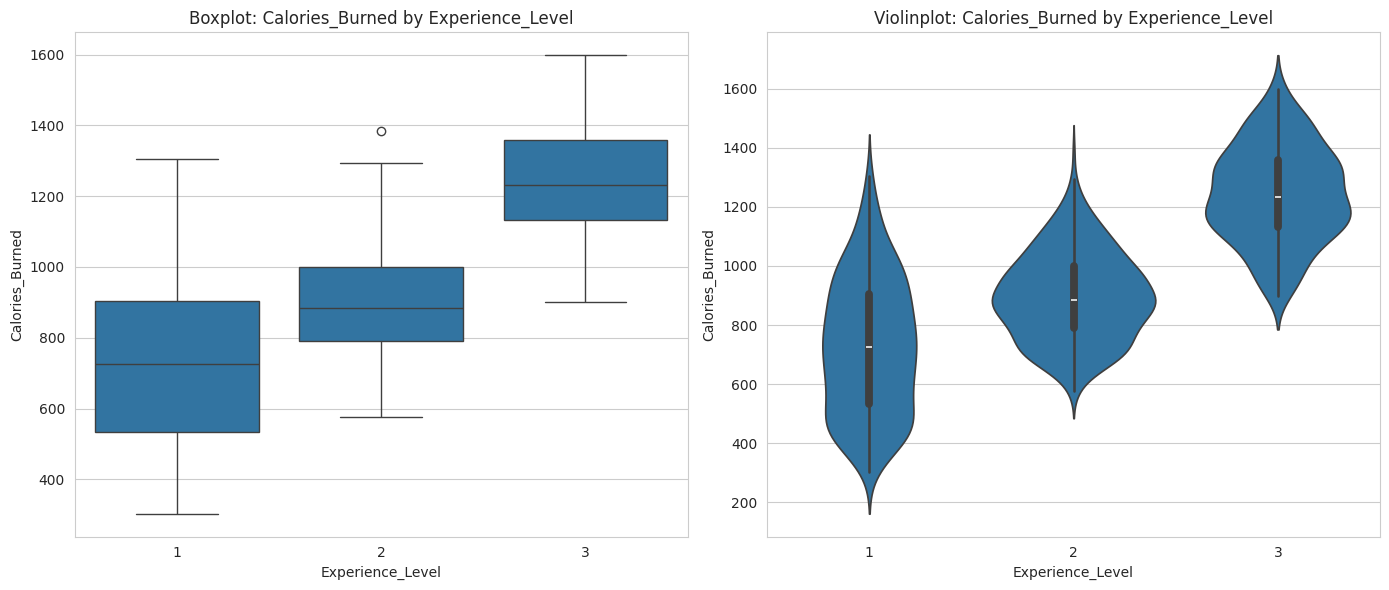

In [129]:
df_filtered = raw_df[['Experience_Level', 'Calories_Burned']].dropna()
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Experience_Level', y='Calories_Burned', data=df_filtered)
plt.title("Boxplot: Calories_Burned by Experience_Level")
plt.subplot(1, 2, 2)
sns.violinplot(x='Experience_Level', y='Calories_Burned', data=df_filtered)
plt.title("Violinplot: Calories_Burned by Experience_Level")
plt.tight_layout()
plt.show()

> The boxplot and violin plot show calories burned by experience level (1-3):
>
>Boxplot: Level 1 has the widest range with outliers above 1400 calories. Levels 2 and 3 are narrower, centered around 800-1000 calories, with no outliers.
>
>Violin plot: Level 1 peaks at 400-800 calories but extends to 1400. Levels 2 and 3 are more concentrated (600-1100 calories), with Level 3 slightly higher.
Summary: Level 1 shows high variability, while Levels 2 and 3 are more consistent, with Level 3 burning slightly more calories on average.



*   **T-Test**



In [130]:
def t_test_between_groups(df):
    beginner = df[df['Experience_Level'] == 1]['Calories_Burned']
    expert = df[df['Experience_Level'] == 3]['Calories_Burned']

    stat, p = ttest_ind(beginner, expert, equal_var=False)
    print(f"== T-Test: Beginner vs Expert ==")
    print(f"Statistic = {stat:.4f}, p-value = {p:.4f}")

    if p < 0.05:
        print("→ Có sự khác biệt đáng kể giữa Beginner và Expert.")
    else:
        print("→ Không có sự khác biệt.")

In [131]:
t_test_between_groups(raw_df)

== T-Test: Beginner vs Expert ==
Statistic = -30.2185, p-value = 0.0000
→ Có sự khác biệt đáng kể giữa Beginner và Expert.


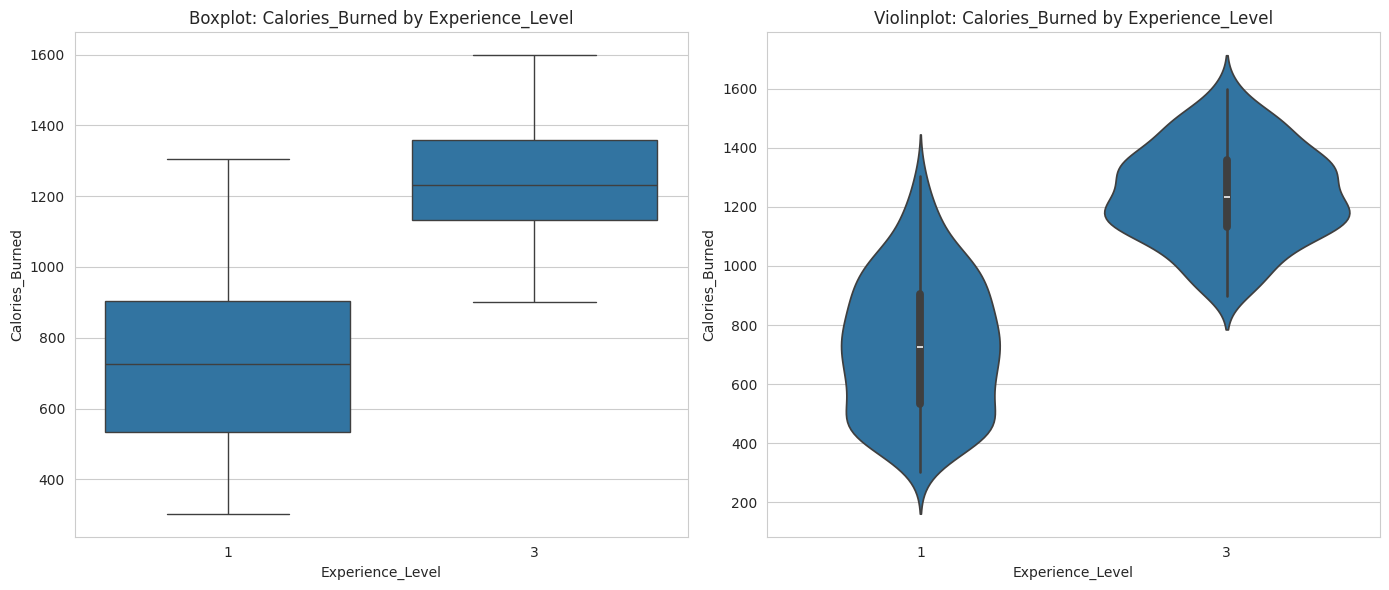

In [132]:
df_filtered = raw_df[raw_df['Experience_Level'].isin([1, 3])][['Experience_Level', 'Calories_Burned']].dropna()
df_filtered['Group'] = df_filtered['Experience_Level'].map({1: 'Beginner', 3: 'Expert'})
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Experience_Level', y='Calories_Burned', data=df_filtered)
plt.title("Boxplot: Calories_Burned by Experience_Level")
plt.subplot(1, 2, 2)
sns.violinplot(x='Experience_Level', y='Calories_Burned', data=df_filtered)
plt.title("Violinplot: Calories_Burned by Experience_Level")
plt.tight_layout()
plt.show()

> Higher experience (Level 3) correlates with consistently higher calories burned, while Level 1 shows greater variability and often lower calories.



*   **Chi-squared**



In [133]:
df = raw_df[['Calories_Burned', 'Experience_Level']].dropna()
median = df['Calories_Burned'].median()
df['Calories_Level'] = df['Calories_Burned'].apply(lambda x: 'High' if x >= median else 'Low')
contingency_table = pd.crosstab(df['Calories_Level'], df['Experience_Level'])
stat, p, dof, expected = chi2_contingency(contingency_table)
print("== Chi-Squared Test ==")
print(f"Statistic = {stat:.4f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Calories Level có liên quan đến Experience_Level.")
else:
    print("→ Không có mối liên hệ đáng kể.")

== Chi-Squared Test ==
Statistic = 259.9923, p-value = 0.0000
→ Calories Level có liên quan đến Experience_Level.


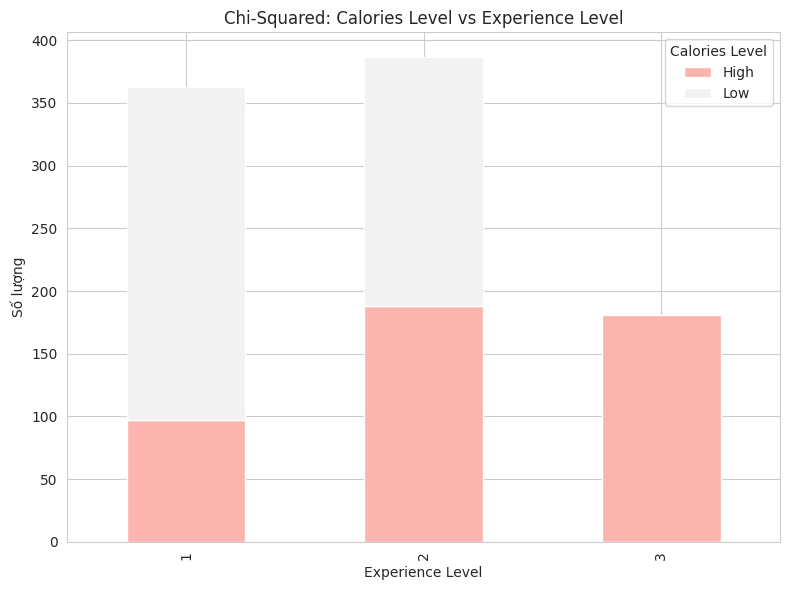

In [134]:
df_chi = raw_df[['Calories_Burned', 'Experience_Level']].dropna()
median = df_chi['Calories_Burned'].median()
df_chi['Calories_Level'] = df_chi['Calories_Burned'].apply(lambda x: 'High' if x >= median else 'Low')

contingency = pd.crosstab(df_chi['Experience_Level'], df_chi['Calories_Level'])

contingency.plot(kind='bar', stacked=True, colormap='Pastel1', figsize=(8, 6))
plt.title("Chi-Squared: Calories Level vs Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Số lượng")
plt.legend(title="Calories Level")
plt.tight_layout()
plt.show()

> Higher experience correlates with consistently high calories burned, while Level 1 has mostly low calories, and Level 2 is balanced.

# **Correlation Analysis**



*   **Heatmap of Pearson Correlation**


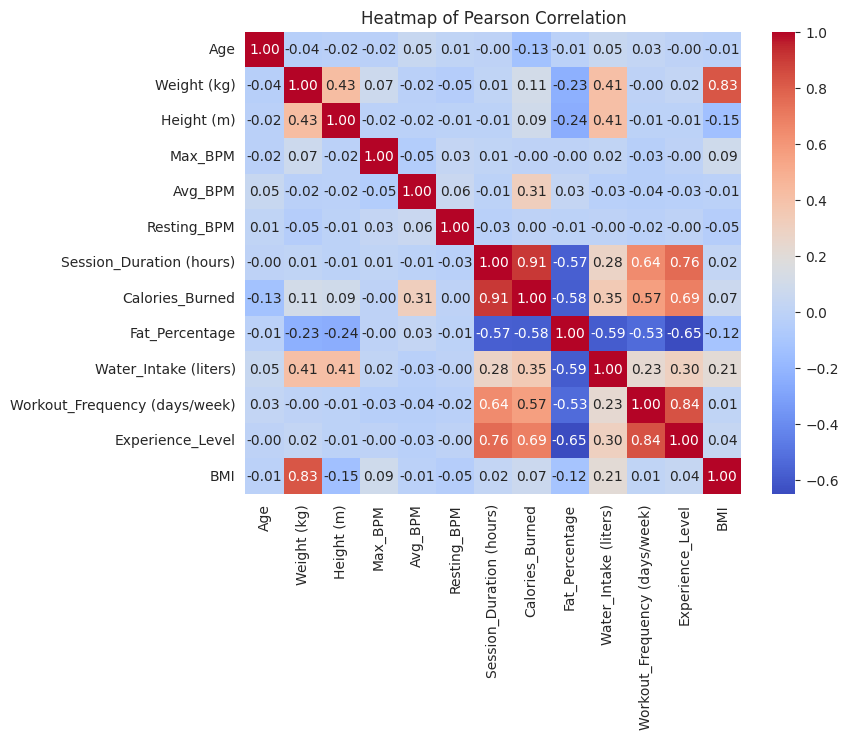

In [135]:
pearson_corr= raw_df.corr(method='pearson', numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Pearson Correlation")
plt.show()



*   **Heatmap of Spearman Correlation**





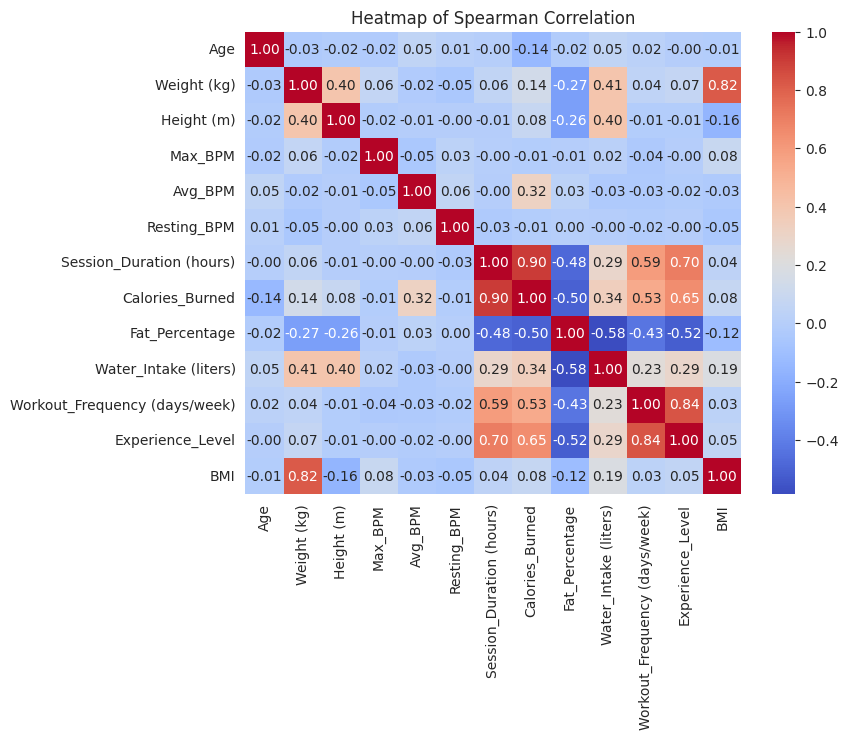

In [136]:
spearman_corr= raw_df.corr(method='spearman', numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Spearman Correlation")
plt.show()



*   **Scatter Plot Between Calories Burned and Session Duration**



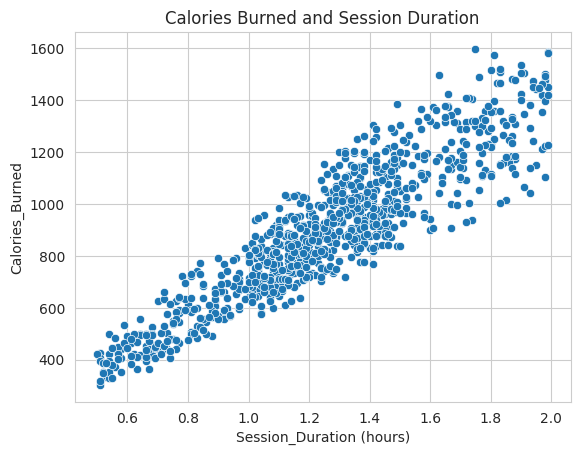

In [137]:
sns.scatterplot(data=raw_df, x='Session_Duration (hours)', y='Calories_Burned')
plt.title('Calories Burned and Session Duration')
plt.show()



*   **Key Correlations between Workout Metrics**



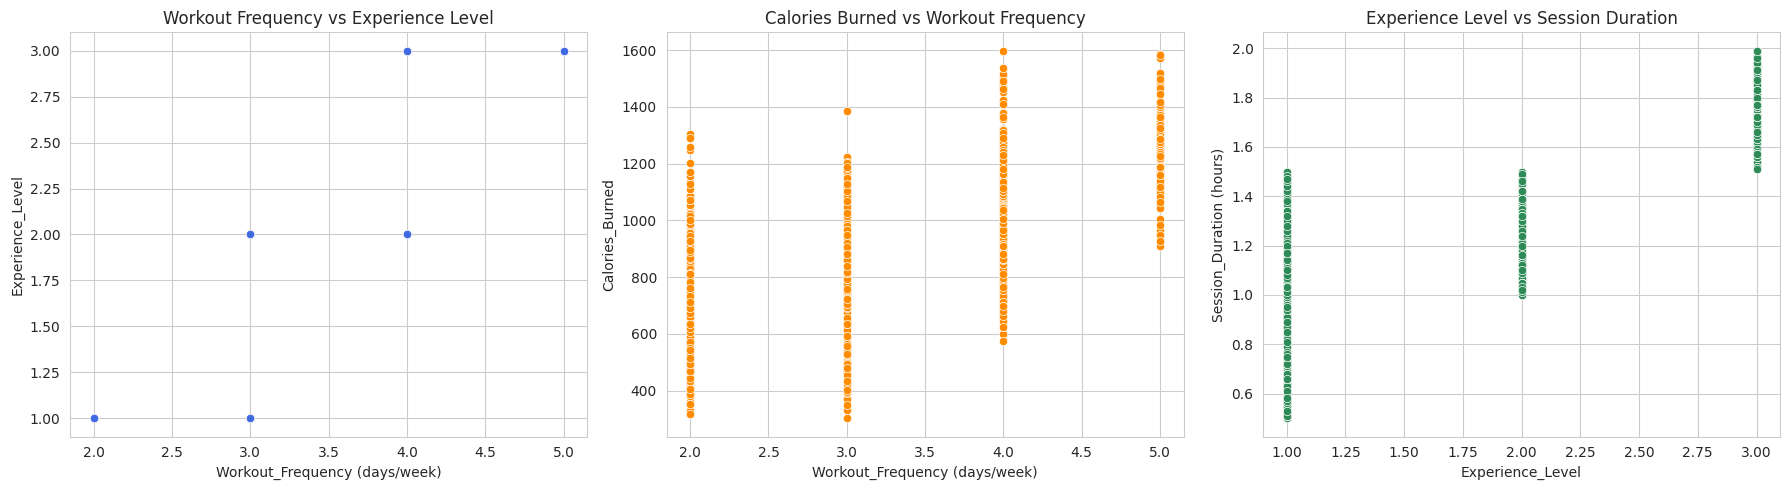

In [138]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(ax=axes[0], data=raw_df, x='Workout_Frequency (days/week)', y='Experience_Level', color='royalblue')
axes[0].set_title('Workout Frequency vs Experience Level')

sns.scatterplot(ax=axes[1], data=raw_df, x='Workout_Frequency (days/week)', y='Calories_Burned', color='darkorange')
axes[1].set_title('Calories Burned vs Workout Frequency')

sns.scatterplot(ax=axes[2], data=raw_df, x='Experience_Level', y='Session_Duration (hours)', color='seagreen')
axes[2].set_title('Experience Level vs Session Duration')

plt.tight_layout()
plt.show()



*   **Scatter Plot Between BMI and Weight (kg)**



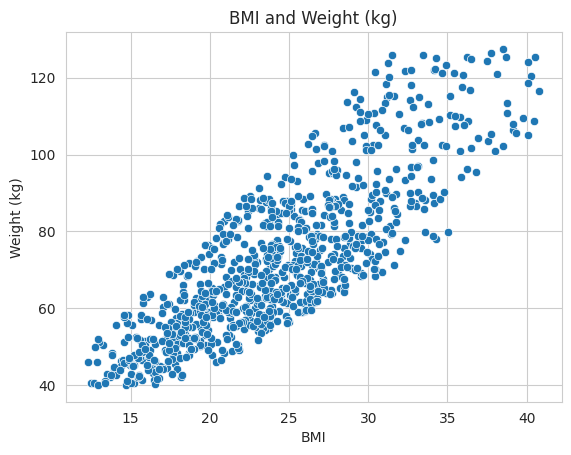

In [139]:
sns.scatterplot(data=raw_df, x='BMI', y='Weight (kg)')
plt.title('BMI and Weight (kg)')
plt.show()



*   **Negative Correlations with Fat Percentage**



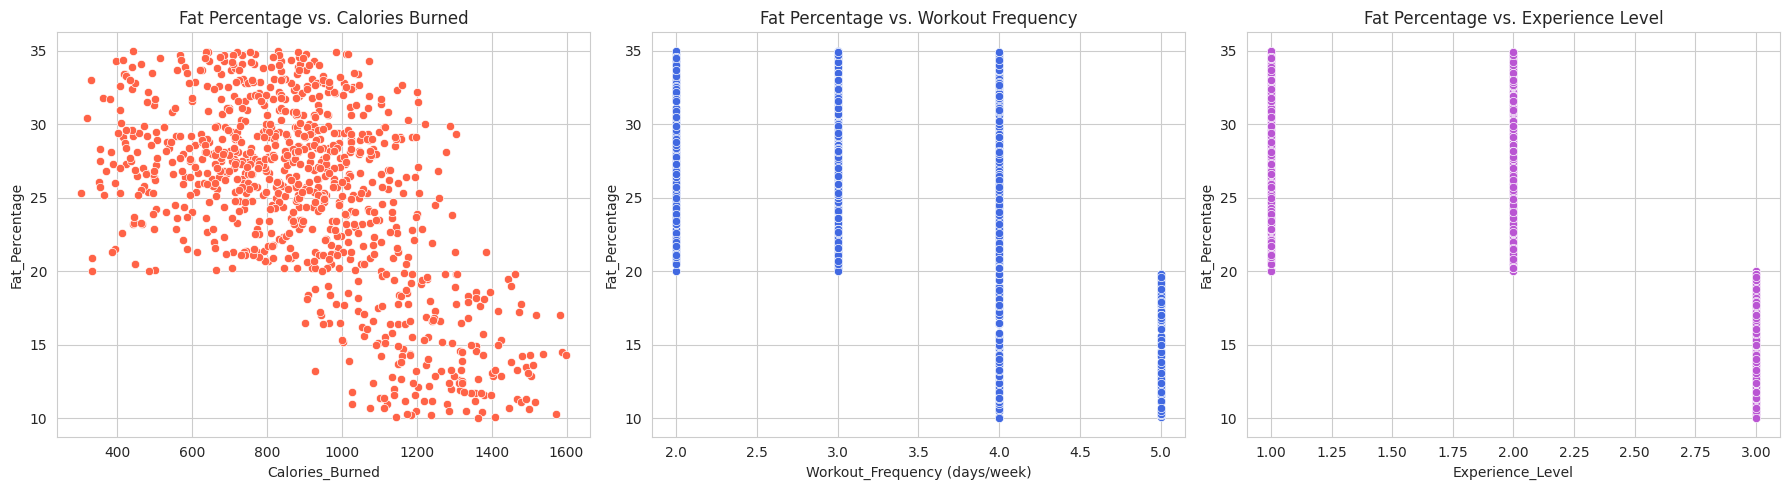

In [140]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(ax=axes[0], data=raw_df, x='Calories_Burned', y='Fat_Percentage', color='tomato')
axes[0].set_title('Fat Percentage vs. Calories Burned')

sns.scatterplot(ax=axes[1], data=raw_df, x='Workout_Frequency (days/week)', y='Fat_Percentage', color='royalblue')
axes[1].set_title('Fat Percentage vs. Workout Frequency')

sns.scatterplot(ax=axes[2], data=raw_df, x='Experience_Level', y='Fat_Percentage', color='mediumorchid')
axes[2].set_title('Fat Percentage vs. Experience Level')

plt.tight_layout()
plt.show()



*   **Pairplot of Key Workout Metrics by Gender**


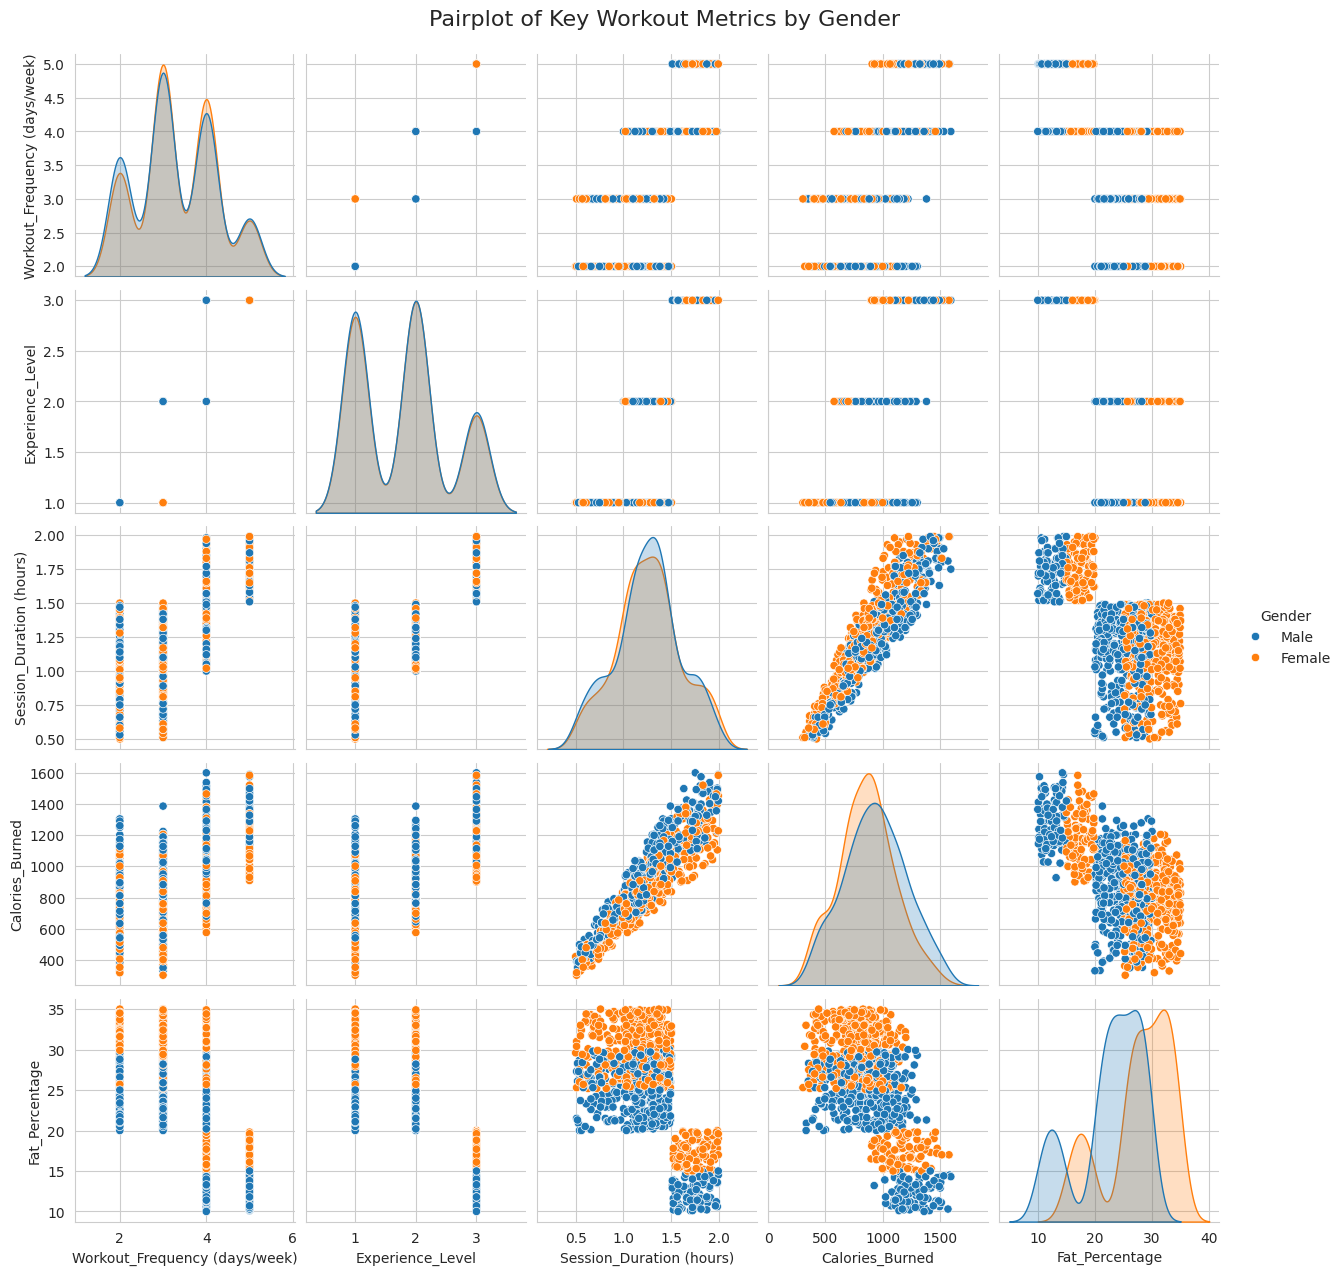

In [141]:
selected_cols = [
    'Workout_Frequency (days/week)',
    'Experience_Level',
    'Session_Duration (hours)',
    'Calories_Burned',
    'Fat_Percentage',
    'Gender'
]

sns.pairplot(data=raw_df[selected_cols], hue='Gender')
plt.suptitle("Pairplot of Key Workout Metrics by Gender", y=1.02, fontsize=16)
plt.show()

## **Insights from Correlation Analysis**

* **Experience vs. Workout Frequency (0.84):** Strong positive correlation. Individuals who work out more frequently tend to have higher experience levels, indicating a link between training consistency and accumulated fitness experience.

* **Calories Burned vs. Workout Frequency (0.69):** Moderate to strong positive correlation. Increased workout frequency leads to more calories burned, as expected with more physical activity.

* **Experience Level vs. Session Duration (0.76):** Strong positive correlation. More experienced individuals tend to engage in longer workout sessions, likely due to better endurance and workout planning.

* **Fat Percentage vs. Calories Burned (-0.58):** Moderate negative correlation. Individuals who burn more calories generally have lower body fat percentages, suggesting effective fat reduction through high activity levels.

* **Fat Percentage vs. Workout Frequency (-0.53):** Moderate negative correlation. Higher workout frequency is associated with lower fat percentage, supporting the value of regular training.

* **Fat Percentage vs. Experience Level (-0.65):** Strong negative correlation. More experienced individuals typically have lower body fat, reflecting the impact of long-term training on body composition.
